# Synthesize a Table (CTGAN)

In [ ]:
%pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.5/201.5 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
real_data = pd.read_excel('/content/drive/MyDrive/Vezilka/SDV models/register-na-cvrst-otpad-2020-godina.xlsx')

In [3]:
real_data.head()

,Институција,Контакт лице,Адреса,е-пошта,Unnamed: 4,Број на дозвола,Шифри,Видови на отпад,m³,t,kg
0,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,130205,Моторномасло,NaN,6.900,NaN
1,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,150202,Отпаднифилтриодмасло и гориво,NaN,NaN,60
2,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,1,Комуналенотпад,NaN,1.500,NaN
3,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,160601,Акумулатори,NaN,2.175,NaN
4,АУТОМОТИВ ГРУП - Скопје,Кирил Калеников,ул.Скупиб.б,todor.dimovski@yahoo.com,45.11,57-567/1,170405,Отпадножелезо,NaN,NaN,247


In [4]:
real_data.drop(columns=["Unnamed: 4", "Број на дозвола", "Шифри"], inplace=True)

In [5]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(real_data)

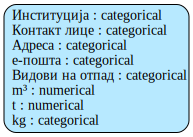

In [6]:
metadata.visualize()

Creating a Synthesizer

In [7]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(real_data)

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


 Generating Synthetic Data

In [8]:
synthetic_data = synthesizer.sample(num_rows=500)
synthetic_data.head()

,Институција,Контакт лице,Адреса,е-пошта,Видови на отпад,m³,t,kg
0,АУТОМОТИВ ГРУП - Скопје,Гордана Илиќ,ул.Скупиб.б,NaN,Пакувањехартија и картон,NaN,14.732,NaN
1,ЈЗУ ГОБ „8 миСептември“ Скопје,Гордана Илиќ,ул. Скупи бр.1,soskovski.dejna@hotmail.com,Измешанкомуналенотпад,NaN,NaN,NaN
2,АУТОМОТИВ ГРУП - Скопје,Гордана Илиќ,ул. Скупи бр. 12,todor.dimovski@yahoo.com,Железо,NaN,6.907,NaN
3,КОРЕА АУТО ТРЕЈД ДООЕЛ СКОПЈЕ,Љубе Нешковски,ул. Скупи бр.1,akitevska@yahoo.com,Батерии и акумулаторинеспоменативо 20 01 33,NaN,NaN,NaN
4,Друштво за трговија со моторни возила и услуги...,Дејан Шошковски,"Бул. 8 Септември бр.2, Лок.1,Скопје",soskovski.dejna@hotmail.com,Антифриз,NaN,13.894,NaN


Evaluating Real vs. Synthetic Data

In [9]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 8/8 [00:00<00:00, 489.91it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 187.58it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [10]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 651.39it/s]|
Column Shapes Score: 74.1%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 101.30it/s]|
Column Pair Trends Score: 43.38%

Overall Score (Average): 58.74%



In [11]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,Институција,TVComplement,0.883349
1,Контакт лице,TVComplement,0.899708
2,Адреса,TVComplement,0.900884
3,е-пошта,TVComplement,0.879184
4,Видови на отпад,TVComplement,0.842605
5,m³,KSComplement,0.194444
6,t,KSComplement,0.502471
7,kg,TVComplement,0.825287


Visualizing the Data

In [12]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='Видови на отпад',
    metadata=metadata
)

fig.show()

In [13]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['Видови на отпад', 't'],
    metadata=metadata
)

fig.show()

CTGAN Customization

In [14]:
custom_synthesizer = CTGANSynthesizer(
    metadata,
    epochs=1000,
    verbose=True)
custom_synthesizer.fit(real_data)

/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning:

The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.

Gen. (-0.88) | Discrim. (-0.42): 100%|██████████| 1000/1000 [01:42<00:00,  9.75it/s]


In [15]:
synthetic_data_customized = custom_synthesizer.sample(num_rows=500)

quality_report = evaluate_quality(
    real_data,
    synthetic_data_customized,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 8/8 [00:00<00:00, 674.19it/s]|
Column Shapes Score: 77.54%

(2/2) Evaluating Column Pair Trends: |██████████| 28/28 [00:00<00:00, 105.95it/s]|
Column Pair Trends Score: 69.86%

Overall Score (Average): 73.7%

